In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
!git pull origin master

From https://github.com/moribello/COVID-19
 * branch              master     -> FETCH_HEAD
Already up to date.


In [76]:
time_series = pd.DataFrame(pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
stpop = pd.DataFrame(pd.read_csv("state_population.csv"))

In [104]:
def tick_dates(time_series):
    """Creates tick labels based on start, end, and in between values by finding the start and end 
    column headers, converting them to date / time, calculating the remaining three quintiles, and converting
    these five values to short month and month date."""
    start_date = datetime.strptime(time_series.columns[11], '%m/%d/%y').date()
    tick1 = start_date.strftime("%b %d")
    end_date = datetime.strptime(time_series.columns[-1], '%m/%d/%y').date()
    tick5 = end_date.strftime("%b %d")
    mid_date = start_date + (end_date - start_date)/2
    tick3 = mid_date.strftime("%b %d")
    tick2 = (start_date + (mid_date - start_date)/2).strftime("%b %d")
    tick4 = (mid_date + (end_date - mid_date)/2).strftime("%b %d")
    return (tick1, tick2, tick3, tick4, tick5)

In [109]:
def plot5_adj(time_series):
    """State values are aggregated across counties for each day and adjusted by population. Raw values are
    pulled from the 'time_series_covid19_confirmed_US.csv' file and state populations are pulled from the
    'state_population.csv' file. Tick markers are calculated by the 'tick dates' function above."""
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
    state1 = input("Please select the first state to be plotted: ")
    line1 = time_series[time_series['Province_State'] == state1].sum().values[11:] / (stpop[stpop['State'] == state1].values[0])[1]
    line2 = time_series[time_series['Province_State'] == 'Rhode Island'].sum().values[11:] / (stpop[stpop['State'] == 'Rhode Island'].values[0])[1]
    line3 = time_series[time_series['Province_State'] == 'Vermont'].sum().values[11:] / (stpop[stpop['State'] == 'Vermont'].values[0])[1]
    line4 = time_series[time_series['Province_State'] == 'New York'].sum().values[11:] / (stpop[stpop['State'] == 'New York'].values[0])[1]
    line5 = time_series[time_series['Province_State'] == 'New Jersey'].sum().values[11:] / (stpop[stpop['State'] == 'New Jersey'].values[0])[1]
    plt.figure(figsize=(20,10))
    plt.plot(line1, color = 'skyblue', label = state1)
    plt.plot(line2, color = 'red', label = "Rhode Island")
    plt.plot(line3, color = 'green', label = "Vermont")
    plt.plot(line4, color = 'orange', label = "New York")
    plt.plot(line5, color = 'purple', label = "New Jersey")
    plt.grid()
    plt.title("Confirmed COVID-19 Cases per 100,000")
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

Please select the first state to be plotted: California


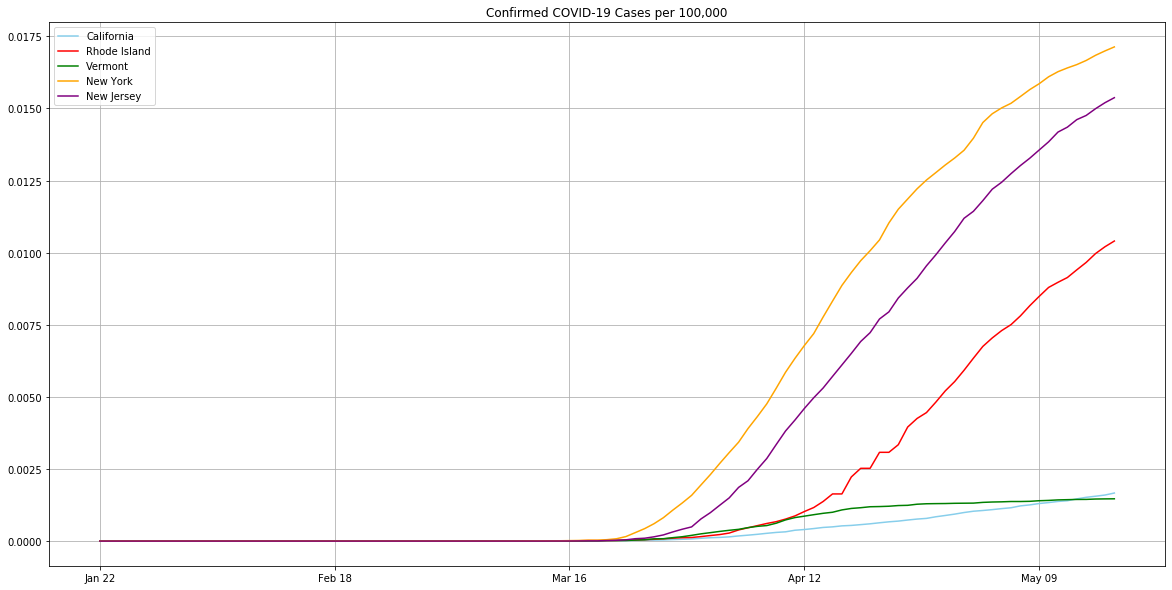

In [111]:
plot5_adj(time_series)

In [119]:
def plot3_adj(time_series):
    """Prompts the user for three states and graphs them based on per capita confirmed cases.
    
    State values are aggregated across counties for each day and adjusted by population. Raw values are
    pulled from the 'time_series_covid19_confirmed_US.csv' file and state populations are pulled from the
    'state_population.csv' file. Tick markers are calculated by the 'tick dates' function above."""
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
    state1 = input("Please select the first state to be plotted: ")
    state2 = input("Please select the second state to be plotted: ")
    state3 = input("Please select the third state to be plotted: ")
    line1 = time_series[time_series['Province_State'] == state1].sum().values[11:] / (stpop[stpop['State'] == state1].values[0])[1]
    line2 = time_series[time_series['Province_State'] == state2].sum().values[11:] / (stpop[stpop['State'] == state2].values[0])[1]
    line3 = time_series[time_series['Province_State'] == state3].sum().values[11:] / (stpop[stpop['State'] == state3].values[0])[1]
    plt.figure(figsize=(20,10))
    plt.plot(line1, color = 'skyblue', label = state1)
    plt.plot(line2, color = 'red', label = state2)
    plt.plot(line3, color = 'green', label = state3)
    plt.grid()
    plt.title("Confirmed COVID-19 Cases per 100,000")
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

Please select the first state to be plotted: Vermont
Please select the second state to be plotted: Massachusetts
Please select the third state to be plotted: New Hampshire


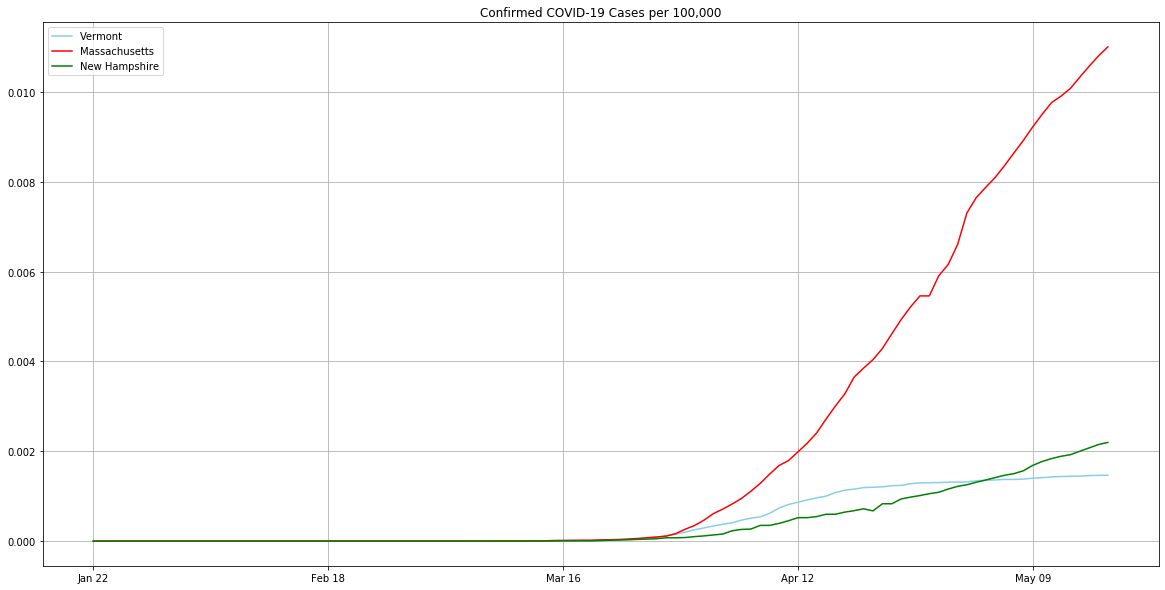

In [132]:
plot3_adj(time_series)

In [100]:
def plot5(time_series):
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
    line1 = time_series[time_series['Province_State'] == 'Massachusetts'].sum().values[11:] 
    line2 = time_series[time_series['Province_State'] == 'Rhode Island'].sum().values[11:] 
    line3 = time_series[time_series['Province_State'] == 'Vermont'].sum().values[11:] 
    line4 = time_series[time_series['Province_State'] == 'New York'].sum().values[11:] 
    line5 = time_series[time_series['Province_State'] == 'New Jersey'].sum().values[11:] 
    plt.figure(figsize=(20,10))
    plt.plot(line1, color = 'skyblue', label = "Massachusetts")
    plt.plot(line2, color = 'red', label = "Rhode Island")
    plt.plot(line3, color = 'green', label = "Vermont")
    plt.plot(line4, color = 'orange', label = "New York")
    plt.plot(line5, color = 'purple', label = "New Jersey")
    plt.grid()
    plt.title("Confirmed COVID-19 Total Cases")
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

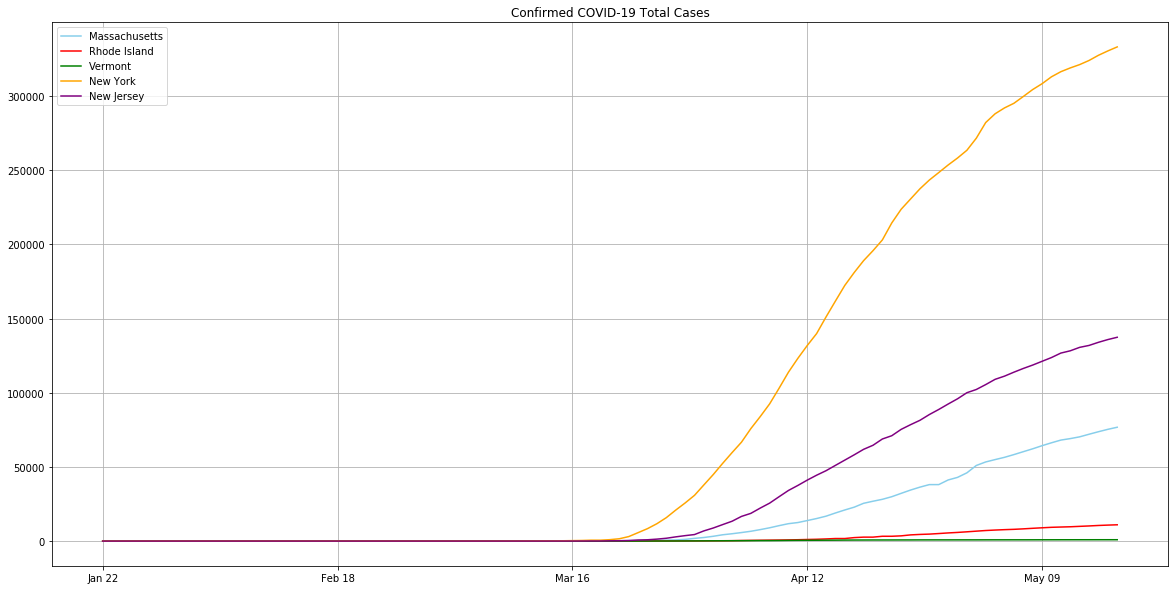

In [101]:
plot5(time_series)

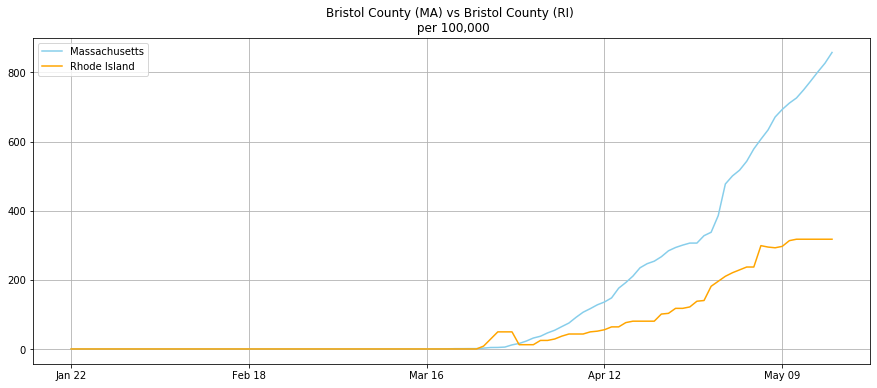

In [130]:
(tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series)
line1 = (time_series[(time_series['Province_State'] == 'Massachusetts') & (time_series['Admin2'] == 'Bristol')].sum().values[12:]) / 5.65
line2 = time_series[(time_series['Province_State'] == 'Rhode Island') & (time_series['Admin2'] == 'Bristol')].sum().values[12:] / .485
plt.figure(figsize=(15,6))
plt.plot(line1, color = 'skyblue', label = "Massachusetts")
plt.plot(line2, color = 'orange', label = "Rhode Island")
plt.grid()
plt.title("Bristol County (MA) vs Bristol County (RI) \n per 100,000")
plt.legend()
plt.xticks([0,25, 50,75, 100], [tick1, tick2, tick3, tick4, tick5]);

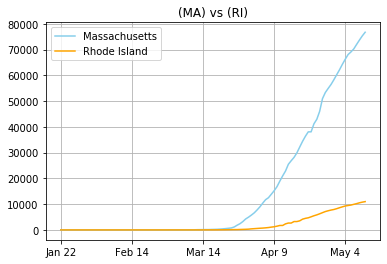

In [60]:
line1 = time_series[(time_series['Province_State'] == 'Massachusetts')].sum().values[12:]
line2 = time_series[(time_series['Province_State'] == 'Rhode Island')].sum().values[12:]
plt.plot(line1, color = 'skyblue', label = "Massachusetts")
plt.plot(line2, color = 'orange', label = "Rhode Island")
plt.grid()
plt.title("(MA) vs (RI)")
plt.legend()
plt.xticks([0,25, 50,75, 100], ["Jan 22", "Feb 14", "Mar 14","Apr 9", "May 4"]);

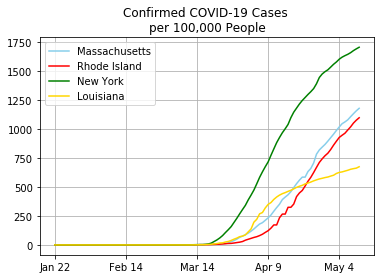

In [61]:
line1 = time_series[time_series['Province_State'] == 'Massachusetts'].sum().values[12:] / 65
line2 = time_series[time_series['Province_State'] == 'Rhode Island'].sum().values[12:] / 10
line3 = time_series[time_series['Province_State'] == 'New York'].sum().values[12:] / 195
line4 = time_series[time_series['Province_State'] == 'Louisiana'].sum().values[12:] / 46.5
plt.plot(line1, color = 'skyblue', label = "Massachusetts")
plt.plot(line2, color = 'red', label = "Rhode Island")
plt.plot(line3, color = 'green', label = "New York")
plt.plot(line4, color = 'gold', label = "Louisiana")
plt.grid()
plt.title("Confirmed COVID-19 Cases \nper 100,000 People")
plt.legend()
plt.xticks([0,25, 50,75, 100], ["Jan 22", "Feb 14", "Mar 14","Apr 9", "May 4"]);